In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

In [ ]:
df=pd.read_csv("/content/House-Price-Prediction-reduced.csv")

In [ ]:
df


,Id,MSSubClass,LotArea,OverallQual,YearBuilt,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,Fireplaces,GarageArea,SalePrice
0,1,60,8450,7,2003,706,150,856,856,854,1710,0,548,208500
1,2,20,9600,6,1976,978,284,1262,1262,0,1262,1,460,181500
2,3,60,11250,7,2001,486,434,920,920,866,1786,1,608,223500
3,4,70,9550,7,1915,216,540,756,961,756,1717,1,642,140000
4,5,60,14260,8,2000,655,490,1145,1145,1053,2198,1,836,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,7917,6,1999,0,953,953,953,694,1647,1,460,175000
1456,1457,20,13175,6,1978,790,589,1542,2073,0,2073,2,500,210000
1457,1458,70,9042,7,1941,275,877,1152,1188,1152,2340,2,252,266500
1458,1459,20,9717,5,1950,49,0,1078,1078,0,1078,0,240,142125


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Id           1460 non-null   int64
 1   MSSubClass   1460 non-null   int64
 2   LotArea      1460 non-null   int64
 3   OverallQual  1460 non-null   int64
 4   YearBuilt    1460 non-null   int64
 5   BsmtFinSF1   1460 non-null   int64
 6   BsmtUnfSF    1460 non-null   int64
 7   TotalBsmtSF  1460 non-null   int64
 8   1stFlrSF     1460 non-null   int64
 9   2ndFlrSF     1460 non-null   int64
 10  GrLivArea    1460 non-null   int64
 11  Fireplaces   1460 non-null   int64
 12  GarageArea   1460 non-null   int64
 13  SalePrice    1460 non-null   int64
dtypes: int64(14)
memory usage: 159.8 KB


In [ ]:
df.head(10)

,Id,MSSubClass,LotArea,OverallQual,YearBuilt,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,Fireplaces,GarageArea,SalePrice
0,1,60,8450,7,2003,706,150,856,856,854,1710,0,548,208500
1,2,20,9600,6,1976,978,284,1262,1262,0,1262,1,460,181500
2,3,60,11250,7,2001,486,434,920,920,866,1786,1,608,223500
3,4,70,9550,7,1915,216,540,756,961,756,1717,1,642,140000
4,5,60,14260,8,2000,655,490,1145,1145,1053,2198,1,836,250000
5,6,50,14115,5,1993,732,64,796,796,566,1362,0,480,143000
6,7,20,10084,8,2004,1369,317,1686,1694,0,1694,1,636,307000
7,8,60,10382,7,1973,859,216,1107,1107,983,2090,2,484,200000
8,9,50,6120,7,1931,0,952,952,1022,752,1774,2,468,129900
9,10,190,7420,5,1939,851,140,991,1077,0,1077,2,205,118000


In [ ]:
df.tail(10)

,Id,MSSubClass,LotArea,OverallQual,YearBuilt,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,Fireplaces,GarageArea,SalePrice
1450,1451,90,9000,5,1974,0,896,896,896,896,1792,0,0,136000
1451,1452,20,9262,8,2008,0,1573,1573,1578,0,1578,1,840,287090
1452,1453,180,3675,5,2005,547,0,547,1072,0,1072,0,525,145000
1453,1454,20,17217,5,2006,0,1140,1140,1140,0,1140,0,0,84500
1454,1455,20,7500,7,2004,410,811,1221,1221,0,1221,0,400,185000
1455,1456,60,7917,6,1999,0,953,953,953,694,1647,1,460,175000
1456,1457,20,13175,6,1978,790,589,1542,2073,0,2073,2,500,210000
1457,1458,70,9042,7,1941,275,877,1152,1188,1152,2340,2,252,266500
1458,1459,20,9717,5,1950,49,0,1078,1078,0,1078,0,240,142125
1459,1460,20,9937,5,1965,830,136,1256,1256,0,1256,0,276,147500


In [ ]:
df.size
#total no. of elements(7*1000)

20440

In [ ]:
df.isnull().sum()

,0
Id,0
MSSubClass,0
LotArea,0
OverallQual,0
YearBuilt,0
BsmtFinSF1,0
BsmtUnfSF,0
TotalBsmtSF,0
1stFlrSF,0
2ndFlrSF,0


In [ ]:
x=df.drop('SalePrice',axis=1)
y=df['SalePrice']

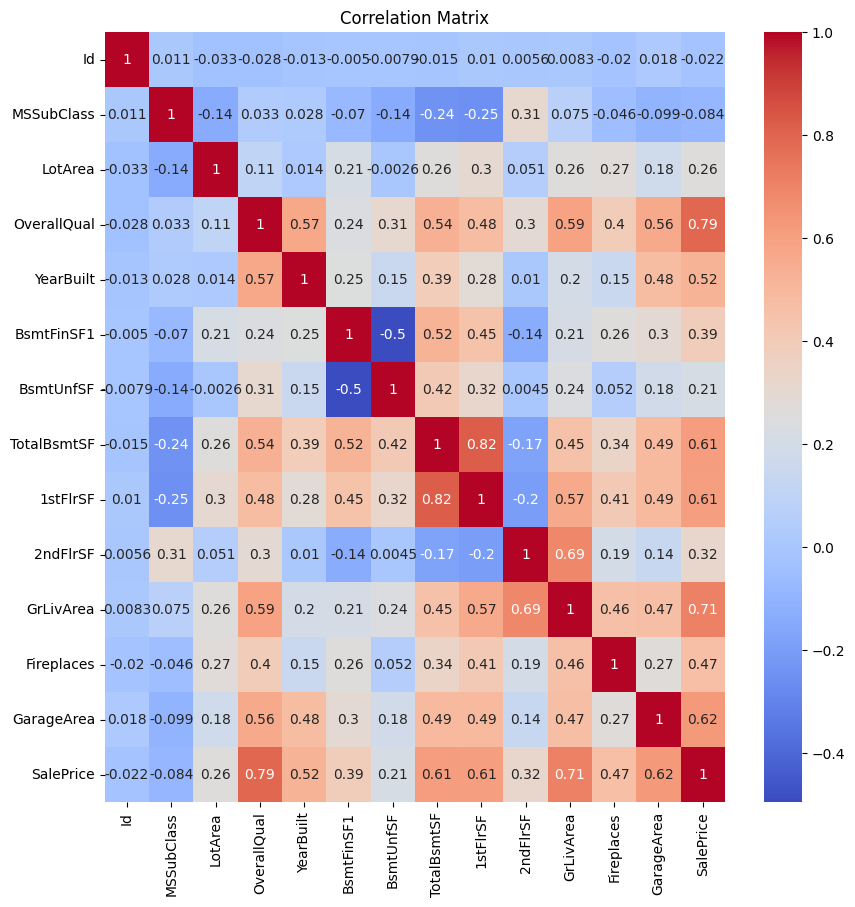

In [ ]:
# Plotting the correlation matrix "Heatmap"

# Setting the figure size for the plot
plt.figure(figsize=(10,10))

# Creating a heatmap of the correlation matrix
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
# df.corr() calculates the correlation coefficients between numerical features
# annot=True adds the correlation values on the heatmap
# cmap='coolwarm' sets the color palette for the heatmap

# Adding a title to the heatmap
plt.title('Correlation Matrix')
# Displaying the heatmap
plt.show()

In [ ]:
#pairplot to visualize relationship between features

# creating a pairplot for the entire dataframe
sns.pairplot(df)
#This will create scatterplots for each pair of features along with  histrograms for individual features

#display the pairplot

plt.show()


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#initialize VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
#calculate VIF for each feature
vif_data["VIF"] = [variance_inflation_factor (x.values, i)
for i in range(len(x.columns))]
print(vif_data)

        feature          VIF
0            Id     4.036570
1    MSSubClass     3.378205
2       LotArea     2.521801
3   OverallQual    46.803066
4     YearBuilt    33.579613
5    BsmtFinSF1    17.408726
6     BsmtUnfSF    21.157864
7   TotalBsmtSF    71.292099
8      1stFlrSF   702.654247
9      2ndFlrSF   139.646711
10    GrLivArea  1110.141247
11   Fireplaces     2.715813
12   GarageArea     9.875646


In [ ]:
x = df.drop(['SalePrice', 'MSSubClass', 'BsmtUnfSF','Fireplaces','1stFlrSF','2ndFlrSF','GarageArea'], axis=1)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#initialize VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
#calculate VIF for each feature
vif_data["VIF"] = [variance_inflation_factor (x.values, i)
for i in range(len(x.columns))]
print(vif_data)

       feature        VIF
0           Id   4.017427
1      LotArea   2.400551
2  OverallQual  39.274829
3    YearBuilt  26.249596
4   BsmtFinSF1   2.711538
5  TotalBsmtSF  13.141586
6    GrLivArea  15.720373


In [ ]:

x.head()
#just to check

,Id,LotArea,OverallQual,YearBuilt,BsmtFinSF1,TotalBsmtSF,GrLivArea
0,1,8450,7,2003,706,856,1710
1,2,9600,6,1976,978,1262,1262
2,3,11250,7,2001,486,920,1786
3,4,9550,7,1915,216,756,1717
4,5,14260,8,2000,655,1145,2198


In [ ]:
#Splitting the dataset into training and testing sets(80% train,20% test)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
'''train_test_split function: This function takes the input data (x and y)
 and splits it into four parts.
 test_size=0.2:Here, it's set to 0.2,
  meaning 20% of the data will be used for testing.'''

"train_test_split function: This function takes the input data (x and y)\n and splits it into four parts.\n test_size=0.2:Here, it's set to 0.2,\n  meaning 20% of the data will be used for testing."

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr_clf = LinearRegression()
lr_clf.fit(x_train,y_train)
score_lr = 100*lr_clf.score(x_test,y_test)
print(f'LR Model score = {score_lr:4.4f}%')
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred_lr = lr.predict(x_test)
R2_Score_lr = round(r2_score(y_pred_lr,y_test) * 100, 2)

print("R2 Score : ",R2_Score_lr,"%")

LR Model score = 80.0413%
R2 Score :  69.32 %


In [ ]:

# prompt: randomforest model score mean cross validation not the r2 score

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

rf_clf = RandomForestRegressor()
rf_clf.fit(x_train, y_train)
score_rf = 100 * rf_clf.score(x_test, y_test)
print(f'Random Forest Regressor Model score = {score_rf:4.4f}%')
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
y_pred_rfr = rfr.predict(x_test)
R2_Score_rfr = round(r2_score(y_pred_rfr,y_test) * 100, 2)

print("R2 Score : ",R2_Score_rfr,"%")

Random Forest Regressor Model score = 87.2538%
R2 Score :  83.3 %


In [ ]:
# prompt: DEcision tree Regressor model score

from sklearn.tree import DecisionTreeRegressor

dt_clf = DecisionTreeRegressor()
dt_clf.fit(x_train, y_train)
score_dt = 100 * dt_clf.score(x_test, y_test)
print(f'Decision Tree Regressor Model score = {score_dt:4.4f}%')

y_pred_dt = dt_clf.predict(x_test)
R2_Score_dt = round(r2_score(y_pred_dt, y_test) * 100, 2)
print("Decision Tree Regressor R2 Score : ", R2_Score_dt, "%")


Decision Tree Regressor Model score = 78.8120%
Decision Tree Regressor R2 Score :  77.67 %


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from numpy import mean

gbr = GradientBoostingRegressor(random_state=1)
gbr.fit(x_train, y_train)

# Cross-validation score as percentage
cv = cross_val_score(gbr, x_train, y_train, cv=5)
mean_cv_score = mean(cv) * 100
print(f"Mean Cross-Validation Score: {mean_cv_score:.2f}%")

# R2 score as percentage
y_pred_gbr = gbr.predict(x_test)
R2_Score_gbr = round(r2_score(y_pred_gbr, y_test) * 100, 2)
print(f"R2 Score: {R2_Score_gbr}%")

Mean Cross-Validation Score: 82.78%
R2 Score: 85.83%
